Mon modèle ne marche pas et j'ai cherché pendant très longtemps à comprendre pourquoi, car il correspond bien au modèle décrit dans l'article. Je me suis rendu compte assez tard que la commande "optimiser.step()" ne mettait pas à jour les paramètres de toutes mes couches, seulement ceux de la première. Cependant je ne comprends pas ce comportement, selon la doc il est censé mettre à jour tous les paramètres de toutes les couches ...
Avec mon modéle j'obtiens des résultats satisfaisants pour le loss. Concernant l'accuracy, elle est très mauvaise.

Si vous avez une idée de pourquoi la commande 'optimiser.step()" ne fait pas ce que je souhaite, je suis tout ouie.

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


class Modele(nn.Module):
    def __init__(self,input_size, output_size, nb_layers):
        super(Modele,self).__init__()
        self.nb_layers = nb_layers
        #First linear transformation 784 -> 10
        self.first_linear = nn.Linear(input_size,output_size, bias=False)
        
        #Linear layers H(x,W_h)
        self.linear = nn.ModuleList([nn.Linear(output_size, output_size, bias= -3) for i in range(nb_layers -1)])
        
        #Linear layers for the gate W(x,W_h)
        self.linear_gate = nn.ModuleList([nn.Linear(output_size, output_size, bias= -3) for i in range(nb_layers -1)])
        
        
    def forward(self,x):
        y = self.first_linear(x)
        
        for layer in range(self.nb_layers -1 ):
            
            T_x = F.sigmoid(self.linear_gate[layer](y))
            
            e = torch.mul(self.linear[layer](y),T_x.t())
            e2 = torch.mul(y,(1- T_x))
            y = torch.add(e,e2) 
            
        #softmax = nn.Softmax()
#         return softmax(y)
        return y
    
    #calcul l'accuracy
    def score(self,test_loader):
        score = 0
        for i,(data,target) in enumerate(test_loader):
            if i == len(test_loader) -1 :
                break
            data.resize_(batch_size,784)
            x = Variable(data)
            out = m.forward(x)
            maxs , indice = torch.max(out,1)
            
            for k,f in enumerate(target):
                if f == int(indice[k].data[0]):
                    score += 1
        return score/(float(batch_size)*len(test_loader))
        
    def train(self,train_loader, nb_epoch):
        y_onehot = torch.FloatTensor(batch_size, nb_digits) 
        error_epoch = []
        l = nn.MSELoss()
        optimisier = torch.optim.SGD([ { 'params' : self.parameters(),'lr' : 0.0002 }], momentum=0.1)
        for j in range(nb_epoch):
            error = []
            for i,(data,target) in enumerate(train_loader):
                # grad a zero
                optimisier.zero_grad()
                
                if (target.size()[0] != batch_size):
                    break 
                data.resize_(batch_size,784)
                x = Variable(data)
                
                y_onehot.zero_()
                y_onehot.scatter_(1, target.view(-1,1), 1)
                y = Variable(y_onehot)

                out = self.forward(x)
                maxs,indice = torch.max(out,1)
                err = l(out,y)
                
                err.backward()
                 
                #maj de la premiere couche seulement !?
                # Je ne comprend pas pourquoi 
                optimisier.step()

                error.append(err.data[0])
            error_epoch.append(np.mean(error))
        return error_epoch

# Avec 4 couches

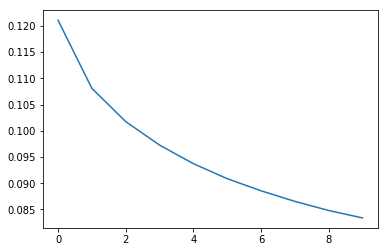

0.39440684713375795

In [64]:
nb_digits=10
nb_epoch = 10
batch_size=64

train_loader= torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 

m = Modele(784,10,4)
e = m.train(train_loader,nb_epoch)
plt.plot(range(nb_epoch),e)
plt.show()
m.score(test_loader)

# Avec 2 couches

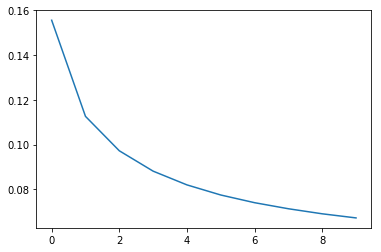

0.6872014331210191

In [67]:
nb_digits=10
nb_epoch = 10
batch_size=64

train_loader= torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 

m = Modele(784,10,2)
e = m.train(train_loader,nb_epoch)
plt.plot(range(nb_epoch),e)
plt.show()
m.score(test_loader)

# Avec 12 couches 

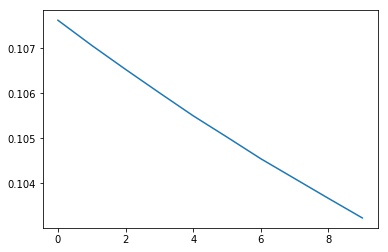

0.10021894904458599

In [66]:
nb_digits=10
nb_epoch = 10
batch_size=64

train_loader= torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 

m = Modele(784,10,12)
e = m.train(train_loader,nb_epoch)
plt.plot(range(nb_epoch),e)
plt.show()
m.score(test_loader)